In [1]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')


import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, GPDC, CMIknn, CMIsymb

import pandas as pd
import numpy as np

from tigramite.models import Models, Prediction

import math
#import sklearn
#from sklearn.linear_model import LinearRegression

/home/saranya/anaconda3/envs/bmap/lib/python3.8/site-packages/tigramite/plotting.py:26: UserWarning: [Errno 2] No such file or directory: '/home/saranya/anaconda3/envs/bmap/lib/python3.8/site-packages/tigramite/../versions.py'
  warnings.warn(str(e))
/home/saranya/anaconda3/envs/bmap/lib/python3.8/site-packages/tigramite/independence_tests/gpdc.py:27: UserWarning: [Errno 2] No such file or directory: '/home/saranya/anaconda3/envs/bmap/lib/python3.8/site-packages/tigramite/independence_tests/../../versions.py'
  warnings.warn(str(e))
/home/saranya/anaconda3/envs/bmap/lib/python3.8/site-packages/tigramite/independence_tests/gpdc_torch.py:33: UserWarning: No module named 'torch'
  warnings.warn(str(e))
/home/saranya/anaconda3/envs/bmap/lib/python3.8/site-packages/tigramite/models.py:29: UserWarning: [Errno 2] No such file or directory: '/home/saranya/anaconda3/envs/bmap/lib/python3.8/site-packages/tigramite/../versions.py'
  warnings.warn(str(e))


In [2]:
def select_links(tau_min, tau_max, parents, children):
    """
    This function selects the causal links that will be tested by
    PCMCI. The links are selected such that per each variable in
    `children` all `parents` are stablished as causes, and no other
    causal relationships exist.
    
    Assumes `parents` and `children` are disjoint sets, and that all
    variables are included in the union of both sets.
    
    Parameters
    ----------
    tau_min : int
        Minimum time lag to test. Note that zero-lags are undirected.
    tau_max : int
        Maximum time lag. Must be larger or equal to tau_min.
    parents : set of int
        List of variables that will be assigned as a parent link.
        Assumed to be disjoint with children
    children : set of int
        List of variables that will be assigned a link from a parent.
        Assumed to be disjoint with parents
    Returns
    -------
    selected_links: dict
        Dictionary of selected links for Tigramite
        
    """

    parents = set(parents)
    children = set(children)

    selected_links = dict()
    # Set the default as all combinations of the selected variables
    for var in [*children, *parents]:
        if var in children:
            # Children can be caused only by parents and by themselves
            selected_links[var] = [
                (parent, -lag)
                for parent in parents
                for lag in range(tau_min, tau_max + 1)
            ]
        else:
            selected_links[var] = []

    return selected_links

In [3]:
p1="../../tigramite_timeseries/"
p2="../../targets/"

In [4]:
df1 = pd.read_csv(p1+"timeseries_all_wp_vongfong.csv",sep=',')
df1.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df1=df1.drop('a', axis=1)
df1=df1.drop('conv_rrate', axis=1)
df1=df1.drop('ls_rrate', axis=1)
df1=df1.drop('mn_conv_prate', axis=1)
df1=df1.drop('mn_ls_prate', axis=1)
df1=df1.drop('mn_tot_prate', axis=1)
df1=df1.drop('outconv_rrate', axis=1)
df1=df1.drop('outls_rrate', axis=1)
df1=df1.drop('outmn_conv_prate', axis=1)
df1=df1.drop('outmn_ls_prate', axis=1)
df1=df1.drop('outmn_tot_prate', axis=1)
d1=pd.read_csv(p2+'2020_integrated_prate_nwp_vongfong.csv')
d1.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
d1=d1.drop('a', axis=1)
dt1=pd.concat([d1,df1],axis=1, join='inner')

In [5]:
df2 = pd.read_csv(p1+"timeseries_all_wp_chanhom.csv",sep=',')
df2.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df2=df2.drop('a', axis=1)
df2=df2.drop('conv_rrate', axis=1)
df2=df2.drop('ls_rrate', axis=1)
df2=df2.drop('mn_conv_prate', axis=1)
df2=df2.drop('mn_ls_prate', axis=1)
df2=df2.drop('mn_tot_prate', axis=1)
df2=df2.drop('outconv_rrate', axis=1)
df2=df2.drop('outls_rrate', axis=1)
df2=df2.drop('outmn_conv_prate', axis=1)
df2=df2.drop('outmn_ls_prate', axis=1)
df2=df2.drop('outmn_tot_prate', axis=1)
d2=pd.read_csv(p2+'2020_integrated_prate_nwp_chanhom.csv')
d2.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
d2=d2.drop('a', axis=1)
dt2=pd.concat([d2,df2],axis=1, join='inner')

In [6]:
df3 = pd.read_csv(p1+"timeseries_all_wp_saudel.csv",sep=',')
df3.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df3=df3.drop('a', axis=1)
df3=df3.drop('conv_rrate', axis=1)
df3=df3.drop('ls_rrate', axis=1)
df3=df3.drop('mn_conv_prate', axis=1)
df3=df3.drop('mn_ls_prate', axis=1)
df3=df3.drop('mn_tot_prate', axis=1)
df3=df3.drop('outconv_rrate', axis=1)
df3=df3.drop('outls_rrate', axis=1)
df3=df3.drop('outmn_conv_prate', axis=1)
df3=df3.drop('outmn_ls_prate', axis=1)
df3=df3.drop('outmn_tot_prate', axis=1)
d3=pd.read_csv(p2+'2020_integrated_prate_nwp_saudel.csv')
d3.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
d3=d3.drop('a', axis=1)
dt3=pd.concat([d3,df3],axis=1, join='inner')

In [7]:
df4 = pd.read_csv(p1+"timeseries_all_wp_molave.csv",sep=',')
df4.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df4=df4.drop('a', axis=1)
df4=df4.drop('conv_rrate', axis=1)
df4=df4.drop('ls_rrate', axis=1)
df4=df4.drop('mn_conv_prate', axis=1)
df4=df4.drop('mn_ls_prate', axis=1)
df4=df4.drop('mn_tot_prate', axis=1)
df4=df4.drop('outconv_rrate', axis=1)
df4=df4.drop('outls_rrate', axis=1)
df4=df4.drop('outmn_conv_prate', axis=1)
df4=df4.drop('outmn_ls_prate', axis=1)
df4=df4.drop('outmn_tot_prate', axis=1)
d4=pd.read_csv(p2+'2020_integrated_prate_nwp_molave.csv')
d4.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
d4=d4.drop('a', axis=1)
dt4=pd.concat([d4,df4],axis=1, join='inner')

In [8]:
df5 = pd.read_csv(p1+"timeseries_all_wp_goni.csv",sep=',')
df5.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df5=df5.drop('a', axis=1)
df5=df5.drop('conv_rrate', axis=1)
df5=df5.drop('ls_rrate', axis=1)
df5=df5.drop('mn_conv_prate', axis=1)
df5=df5.drop('mn_ls_prate', axis=1)
df5=df5.drop('mn_tot_prate', axis=1)
df5=df5.drop('outconv_rrate', axis=1)
df5=df5.drop('outls_rrate', axis=1)
df5=df5.drop('outmn_conv_prate', axis=1)
df5=df5.drop('outmn_ls_prate', axis=1)
df5=df5.drop('outmn_tot_prate', axis=1)
d5=pd.read_csv(p2+'2020_integrated_prate_nwp_goni.csv')
d5.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
d5=d5.drop('a', axis=1)
dt5=pd.concat([d5,df5],axis=1, join='inner')

In [9]:
df6 = pd.read_csv(p1+"timeseries_all_amphan.csv",sep=',')
df6.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df6=df6.drop('a', axis=1)
df6=df6.drop('conv_rrate', axis=1)
df6=df6.drop('ls_rrate', axis=1)
df6=df6.drop('mn_conv_prate', axis=1)
df6=df6.drop('mn_ls_prate', axis=1)
df6=df6.drop('mn_tot_prate', axis=1)
df6=df6.drop('outconv_rrate', axis=1)
df6=df6.drop('outls_rrate', axis=1)
df6=df6.drop('outmn_conv_prate', axis=1)
df6=df6.drop('outmn_ls_prate', axis=1)
df6=df6.drop('outmn_tot_prate', axis=1)
d6=pd.read_csv(p2+'2020_integrated_prate_nio_amphan.csv')
d6.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
d6=d6.drop('a', axis=1)
dt6=pd.concat([d6,df6],axis=1, join='inner')

In [10]:
df7 = pd.read_csv(p1+"timeseries_all_nio_kyaar.csv",sep=',')
df7.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df7=df7.drop('a', axis=1)
df7=df7.drop('conv_rrate', axis=1)
df7=df7.drop('ls_rrate', axis=1)
df7=df7.drop('mn_conv_prate', axis=1)
df7=df7.drop('mn_ls_prate', axis=1)
df7=df7.drop('mn_tot_prate', axis=1)
df7=df7.drop('outconv_rrate', axis=1)
df7=df7.drop('outls_rrate', axis=1)
df7=df7.drop('outmn_conv_prate', axis=1)
df7=df7.drop('outmn_ls_prate', axis=1)
df7=df7.drop('outmn_tot_prate', axis=1)
d7=pd.read_csv(p2+'2019_integrated_prate_nio_kyaar.csv')
d7.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
d7=d7.drop('a', axis=1)
dt7=pd.concat([d7,df7],axis=1, join='inner')

In [11]:
df8 = pd.read_csv(p1+"timeseries_all_nio_pawan.csv",sep=',')
df8.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df8=df8.drop('a', axis=1)
df8=df8.drop('conv_rrate', axis=1)
df8=df8.drop('ls_rrate', axis=1)
df8=df8.drop('mn_conv_prate', axis=1)
df8=df8.drop('mn_ls_prate', axis=1)
df8=df8.drop('mn_tot_prate', axis=1)
df8=df8.drop('outconv_rrate', axis=1)
df8=df8.drop('outls_rrate', axis=1)
df8=df8.drop('outmn_conv_prate', axis=1)
df8=df8.drop('outmn_ls_prate', axis=1)
df8=df8.drop('outmn_tot_prate', axis=1)
d8=pd.read_csv(p2+'2019_integrated_prate_nio_pawan.csv')
d8.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
d8=d8.drop('a', axis=1)
dt8=pd.concat([d8,df8],axis=1, join='inner')

In [12]:
df9 = pd.read_csv(p1+"timeseries_all_nio_maha.csv",sep=',')
df9.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df9=df9.drop('a', axis=1)
df9=df9.drop('conv_rrate', axis=1)
df9=df9.drop('ls_rrate', axis=1)
df9=df9.drop('mn_conv_prate', axis=1)
df9=df9.drop('mn_ls_prate', axis=1)
df9=df9.drop('mn_tot_prate', axis=1)
df9=df9.drop('outconv_rrate', axis=1)
df9=df9.drop('outls_rrate', axis=1)
df9=df9.drop('outmn_conv_prate', axis=1)
df9=df9.drop('outmn_ls_prate', axis=1)
df9=df9.drop('outmn_tot_prate', axis=1)
d9=pd.read_csv(p2+'2019_integrated_prate_nio_maha.csv')
d9.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
d9=d9.drop('a', axis=1)
dt9=pd.concat([d9,df9],axis=1, join='inner')

In [13]:
df10 = pd.read_csv(p1+"timeseries_all_nio_bulbul.csv",sep=',')
df10.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df10=df10.drop('a', axis=1)
df10=df10.drop('conv_rrate', axis=1)
df10=df10.drop('ls_rrate', axis=1)
df10=df10.drop('mn_conv_prate', axis=1)
df10=df10.drop('mn_ls_prate', axis=1)
df10=df10.drop('mn_tot_prate', axis=1)
df10=df10.drop('outconv_rrate', axis=1)
df10=df10.drop('outls_rrate', axis=1)
df10=df10.drop('outmn_conv_prate', axis=1)
df10=df10.drop('outmn_ls_prate', axis=1)
df10=df10.drop('outmn_tot_prate', axis=1)
d10=pd.read_csv(p2+'2019_integrated_prate_nio_bulbul.csv')
d10.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
d10=d10.drop('a', axis=1)
dt10=pd.concat([d10,df10],axis=1, join='inner')

In [14]:
tc1=dt1.values
tc2=dt2.values
tc3=dt3.values
tc4=dt4.values
tc5=dt5.values
tc6=dt6.values
tc7=dt7.values
tc8=dt8.values
tc9=dt9.values
tc10=dt10.values

In [15]:
print(tc1.shape)
print(tc2.shape)
print(tc3.shape)
print(tc4.shape)
print(tc5.shape)
print(tc6.shape)
print(tc7.shape)
print(tc8.shape)
print(tc9.shape)
print(tc10.shape)

(81, 261)
(110, 261)
(79, 261)
(59, 261)
(97, 261)
(51, 261)
(93, 261)
(54, 261)
(111, 261)
(55, 261)


In [16]:
var_names=dt1.columns.values.tolist()

In [24]:
var_names

['Prec_Intg',
 'Pmin',
 'w10max',
 'div100',
 'div200',
 'div250',
 'div300',
 'div400',
 'div500',
 'eqt1000',
 'eqt200',
 'eqt250',
 'eqt300',
 'eqt400',
 'eqt500',
 'eqt600',
 'eqt700',
 'eqt850',
 'eqt925',
 'sh850_200',
 'sh850_250',
 'sh925_200',
 'sh925_250',
 'wstrss10',
 '2mdewtmp',
 '2mtmp',
 'conv_ppt',
 'tot_cld_ice',
 'tot_cldwtr',
 'tot_cld_rain',
 'vi_div_cld_froz_wtr',
 'vi_div_cld_liq_wtr',
 'vi_div_mass_flux',
 'vi_div_moisture_flux',
 'vi_div_tot_enrgy_flux',
 'vi_pe_inte',
 'vi_pe_ie_latentenrgy',
 'vi_olr',
 'vi_tot_enrgy',
 'vi_moisture_div',
 'cape',
 'inst_moisture_flux',
 'inst_ssh_flux',
 'surfmean_lhf',
 'surfmean_shf',
 'vimean_moisture_div',
 'surf_lhf',
 'surf_shf',
 'tot_suprcool_liqwtr',
 'tot_wtr_vpr',
 'sst',
 'vort_10',
 'vort_20',
 'vort_30',
 'vort_50',
 'vort_70',
 'vort_100',
 'vort_150',
 'vort_200',
 'vort_250',
 'vort_300',
 'vort_400',
 'vort_500',
 'vort_600',
 'vort_700',
 'vort_800',
 'vort_850',
 'vort_900',
 'vort_925',
 'vort_950',
 'vor

In [17]:
dd={'cyclone1':tc1,'cyclone2':tc2,'cyclone3':tc3,'cyclone4':tc4,'cyclone5':tc5,'cyclone6':tc6,'cyclone7':tc7,
   'cyclone8':tc8,'cyclone9':tc9,'cyclone10':tc10}

In [18]:
data=dd
dataframe = pp.DataFrame(data,analysis_mode ='multiple', var_names=var_names)
tau_max0 = 16
tau_min0 = 1

In [19]:
for member in dataframe.values.keys():
    children = [0,1,2]
    parents = np.arange(3,261)
    sel_links = select_links(tau_min0, tau_max0, parents, children)

In [20]:
pc_alpha = 0.01
pcmci = PCMCI(dataframe = dataframe, cond_ind_test = ParCorr())
results = pcmci.run_pcmciplus(selected_links = sel_links, tau_min = tau_min0, tau_max = tau_max0,  pc_alpha = pc_alpha)
pcmci.verbosity = 2

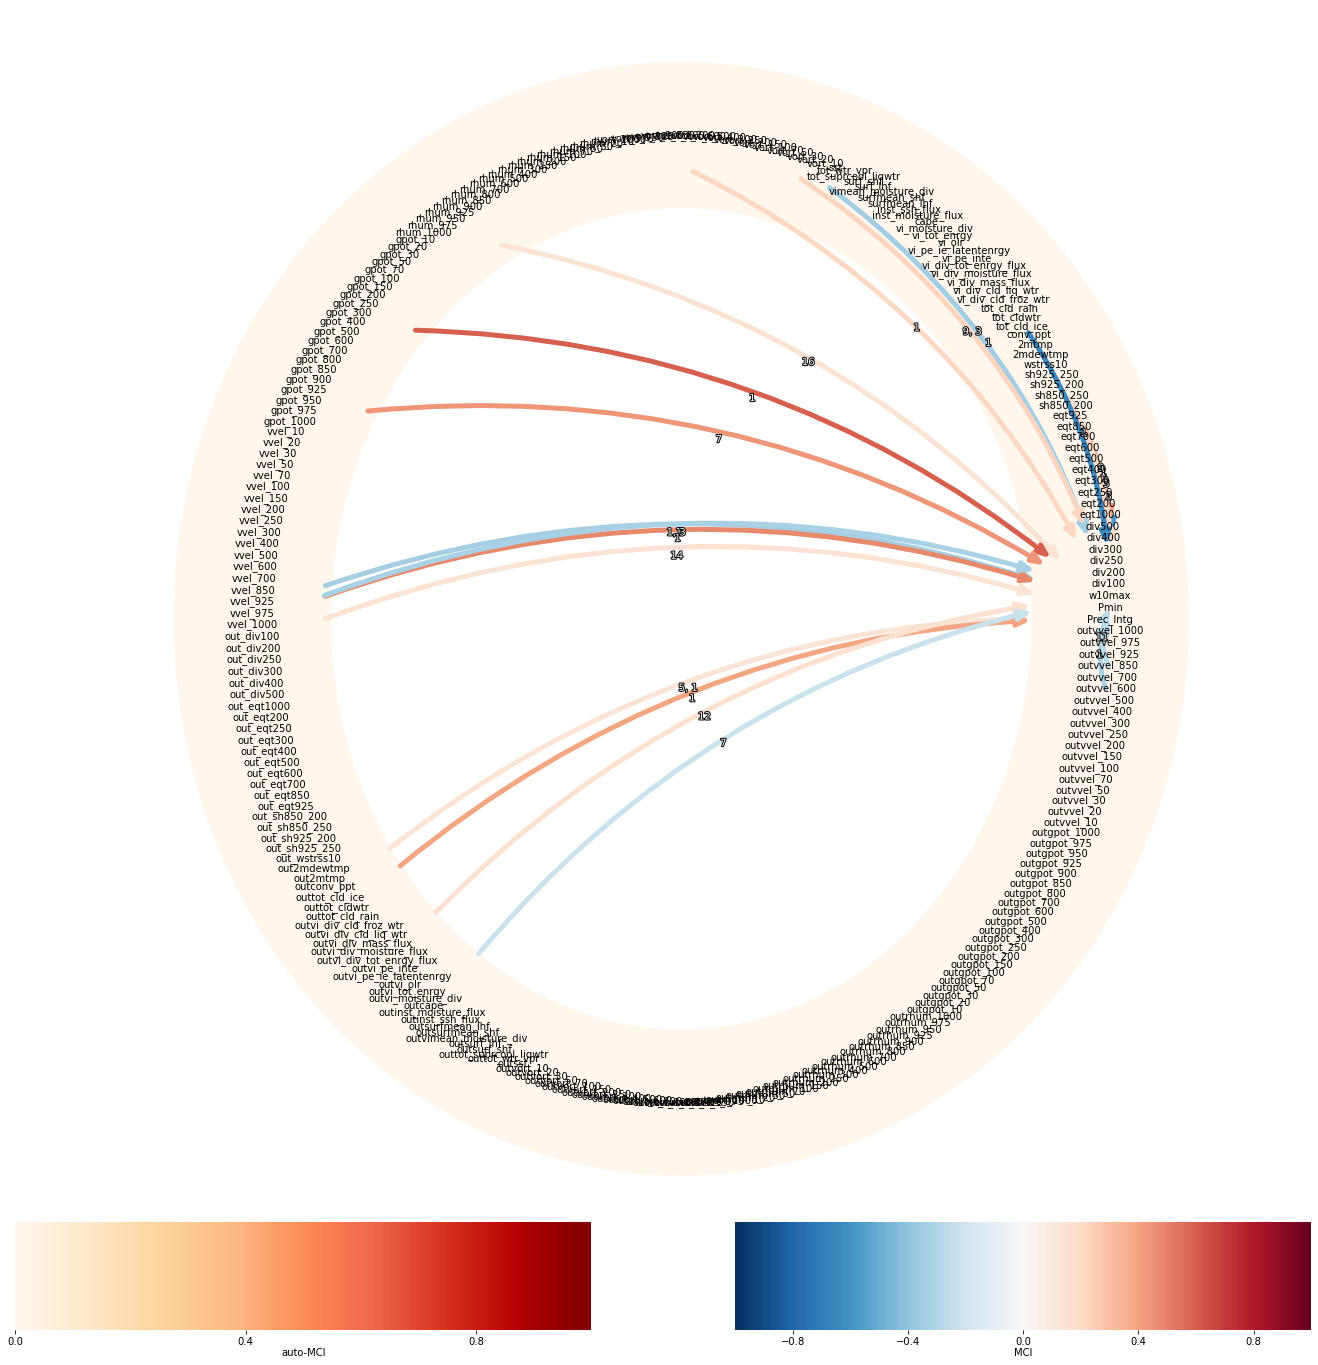

In [21]:
fig=plt.rcParams["figure.figsize"] = (20,25)
tp.plot_graph(graph=results['graph'], val_matrix=results['val_matrix'], var_names=var_names)
plt.show()

In [22]:
pcmci.print_significant_links(p_matrix=results['p_matrix'],
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)


## Significant links at alpha = 0.01:

    Variable Prec_Intg has 8 link(s):
        (vi_div_moisture_flux -1): pval = 0.00000 | val = -0.641
        (outtot_cld_rain -1): pval = 0.00000 | val =  0.398
        (outvvel_600 -1): pval = 0.00000 | val = -0.324
        (conv_ppt -9): pval = 0.00003 | val =  0.194
        (out_div200 -14): pval = 0.00117 | val =  0.151
        (rhum_1000 -16): pval = 0.00180 | val =  0.145
        (outtot_cld_ice -5): pval = 0.00286 | val =  0.139
        (outtot_cld_ice -1): pval = 0.00293 | val =  0.138

    Variable Pmin has 10 link(s):
        (gpot_500 -1): pval = 0.00000 | val =  0.598
        (wstrss10 -1): pval = 0.00000 | val = -0.569
        (vvel_1000 -1): pval = 0.00000 | val =  0.479
        (gpot_1000 -7): pval = 0.00000 | val =  0.440
        (vort_150 -1): pval = 0.00000 | val = -0.350
        (vvel_975 -1): pval = 0.00000 | val = -0.344
        (outvvel_850 -11): pval = 0.00000 | val = -0.268
        (vort_1000 -1): pval = 0.00000 | val = 

In [23]:
pcmci.verbosity = 1
results = pcmci.run_pc_stable(selected_links = sel_links, tau_max=tau_max0, tau_min=tau_min0, pc_alpha=0.01)


##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:
selected_links = {0: [(3, -1), (3, -2), (3, -3), (3, -4), (3, -5), (3, -6), (3, -7), (3, -8), (3, -9), (3, -10), (3, -11), (3, -12), (3, -13), (3, -14), (3, -15), (3, -16), (4, -1), (4, -2), (4, -3), (4, -4), (4, -5), (4, -6), (4, -7), (4, -8), (4, -9), (4, -10), (4, -11), (4, -12), (4, -13), (4, -14), (4, -15), (4, -16), (5, -1), (5, -2), (5, -3), (5, -4), (5, -5), (5, -6), (5, -7), (5, -8), (5, -9), (5, -10), (5, -11), (5, -12), (5, -13), (5, -14), (5, -15), (5, -16), (6, -1), (6, -2), (6, -3), (6, -4), (6, -5), (6, -6), (6, -7), (6, -8), (6, -9), (6, -10), (6, -11), (6, -12), (6, -13), (6, -14), (6, -15), (6, -16), (7, -1), (7, -2), (7, -3), (7, -4), (7, -5), (7, -6), (7, -7), (7, -8), (7, -9), (7, -10), (7, -11), (7, -12), (7, -13), (7, -14), (7, -15), (7, -16), (8, -1), (8, -2), (8, -3), (8, -4), (8, -5), (8, -6), (8, -7), (8, -8), (8, -9), (8, -10), (8, -11), (8, -12), (8, -13), (8, -14), (8, -15), (8, -16), (9, 


## Resulting lagged parent (super)sets:

    Variable Prec_Intg has 10 link(s):
        (outtot_cld_ice -1): max_pval = 0.00001, min_val =  0.208
        (vi_div_moisture_flux -1): max_pval = 0.00001, min_val = -0.207
        (outtot_cld_rain -1): max_pval = 0.00046, min_val =  0.161
        (conv_ppt -9): max_pval = 0.00051, min_val =  0.161
        (outvvel_600 -1): max_pval = 0.00079, min_val = -0.155
        (out_div200 -14): max_pval = 0.00114, min_val =  0.150
        (vi_div_moisture_flux -7): max_pval = 0.00162, min_val = -0.146
        (outtot_cld_ice -5): max_pval = 0.00508, min_val =  0.130
        (out_eqt500 -11): max_pval = 0.00903, min_val =  0.121
        (rhum_1000 -16): max_pval = 0.00975, min_val =  0.120

    Variable Pmin has 10 link(s):
        (wstrss10 -1): max_pval = 0.00000, min_val = -0.539
        (vort_150 -1): max_pval = 0.00000, min_val = -0.271
        (vvel_1000 -1): max_pval = 0.00000, min_val =  0.253
        (gpot_500 -1): max_pval = 0.00005, min_va

In [ ]:


for member in dataframe.values.keys():
    tp.plot_timeseries(selected_dataset = member, dataframe = dataframe)
    plt.show()

